# DATA UNDERSTANDING

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\ravdess_dm1_2223\\ravdess_features.csv")


In [3]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [4]:
df.dtypes

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
actor                  float64
sex                     object
channels                 int64
sample_width             int64
frame_rate               int64
frame_width              int64
length_ms                int64
frame_count            float64
intensity              float64
zero_crossings_sum       int64
mfcc_mean              float64
mfcc_std               float64
mfcc_min               float64
mfcc_max               float64
sc_mean                float64
sc_std                 float64
sc_min                 float64
sc_max                 float64
sc_kur                 float64
sc_skew                float64
stft_mean              float64
stft_std               float64
stft_min               float64
stft_max               float64
stft_kur               float64
stft_skew              float64
mean    

In [5]:
df.shape

(2452, 38)

In [6]:
for i in range(9):
    print(df.iloc[:,i].value_counts())

audio-only    2452
Name: modality, dtype: int64
speech    1335
song       921
Name: vocal_channel, dtype: int64
fearful      376
angry        376
happy        376
calm         376
sad          376
surprised    192
disgust      192
neutral      188
Name: emotion, dtype: int64
normal    1320
strong    1132
Name: emotional_intensity, dtype: int64
Dogs are sitting by the door    1226
Kids are talking by the door    1226
Name: statement, dtype: int64
2nd    1226
1st    1226
Name: repetition, dtype: int64
22.0    65
12.0    63
14.0    62
20.0    61
8.0     61
19.0    60
13.0    60
2.0     58
16.0    58
24.0    58
5.0     58
10.0    56
21.0    55
11.0    55
6.0     55
17.0    55
4.0     52
3.0     51
1.0     51
7.0     51
23.0    51
9.0     51
15.0    44
18.0    35
Name: actor, dtype: int64
M    1248
F    1204
Name: sex, dtype: int64
1    2446
2       6
Name: channels, dtype: int64


In [7]:
print(df.iloc[:,9:24].describe())

       sample_width  frame_rate  frame_width    length_ms    frame_count  \
count        2452.0      2452.0  2452.000000  2452.000000    2452.000000   
mean            2.0     48000.0     2.004894  4092.151305  193587.188010   
std             0.0         0.0     0.098833   598.321526   36825.369056   
min             2.0     48000.0     2.000000  2936.000000      -1.000000   
25%             2.0     48000.0     2.000000  3604.000000  172972.000000   
50%             2.0     48000.0     2.000000  4004.000000  190591.000000   
75%             2.0     48000.0     2.000000  4538.000000  217817.000000   
max             2.0     48000.0     4.000000  6373.000000  305906.000000   

         intensity  zero_crossings_sum    mfcc_mean     mfcc_std     mfcc_min  \
count  1636.000000         2452.000000  2452.000000  2452.000000  2452.000000   
mean    -37.625332        12885.314029   -28.769180   136.777233  -758.909381   
std       8.451982         3665.319584     4.461886    20.451689    99.9

In [8]:
print(df.iloc[:,24:39].describe())

            sc_kur      sc_skew    stft_mean     stft_std     stft_min  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean     -1.142642     0.348442     0.475846     0.331371     0.002272   
std       0.572654     0.353005     0.082551     0.023773     0.004830   
min      -1.795576    -0.510390     0.214089     0.210126     0.000000   
25%      -1.496187     0.098549     0.415260     0.317780     0.000000   
50%      -1.308938     0.347621     0.475740     0.334224     0.000190   
75%      -0.982944     0.557427     0.530571     0.349272     0.001999   
max       3.657953     1.825436     0.724077     0.391928     0.039378   

       stft_max     stft_kur    stft_skew          mean          std  \
count    2452.0  2452.000000  2452.000000  2.452000e+03  2452.000000   
mean        1.0    -1.247929     0.112889  1.393649e-08     0.020504   
std         0.0     0.211781     0.330759  4.267587e-05     0.021024   
min         1.0    -1.669603    -0.993957 -9.

In [9]:
numerical_cols=df.iloc[:,10:len(df)].columns

In [10]:
print(numerical_cols)

Index(['frame_rate', 'frame_width', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_max', 'stft_kur',
       'stft_skew', 'mean', 'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')


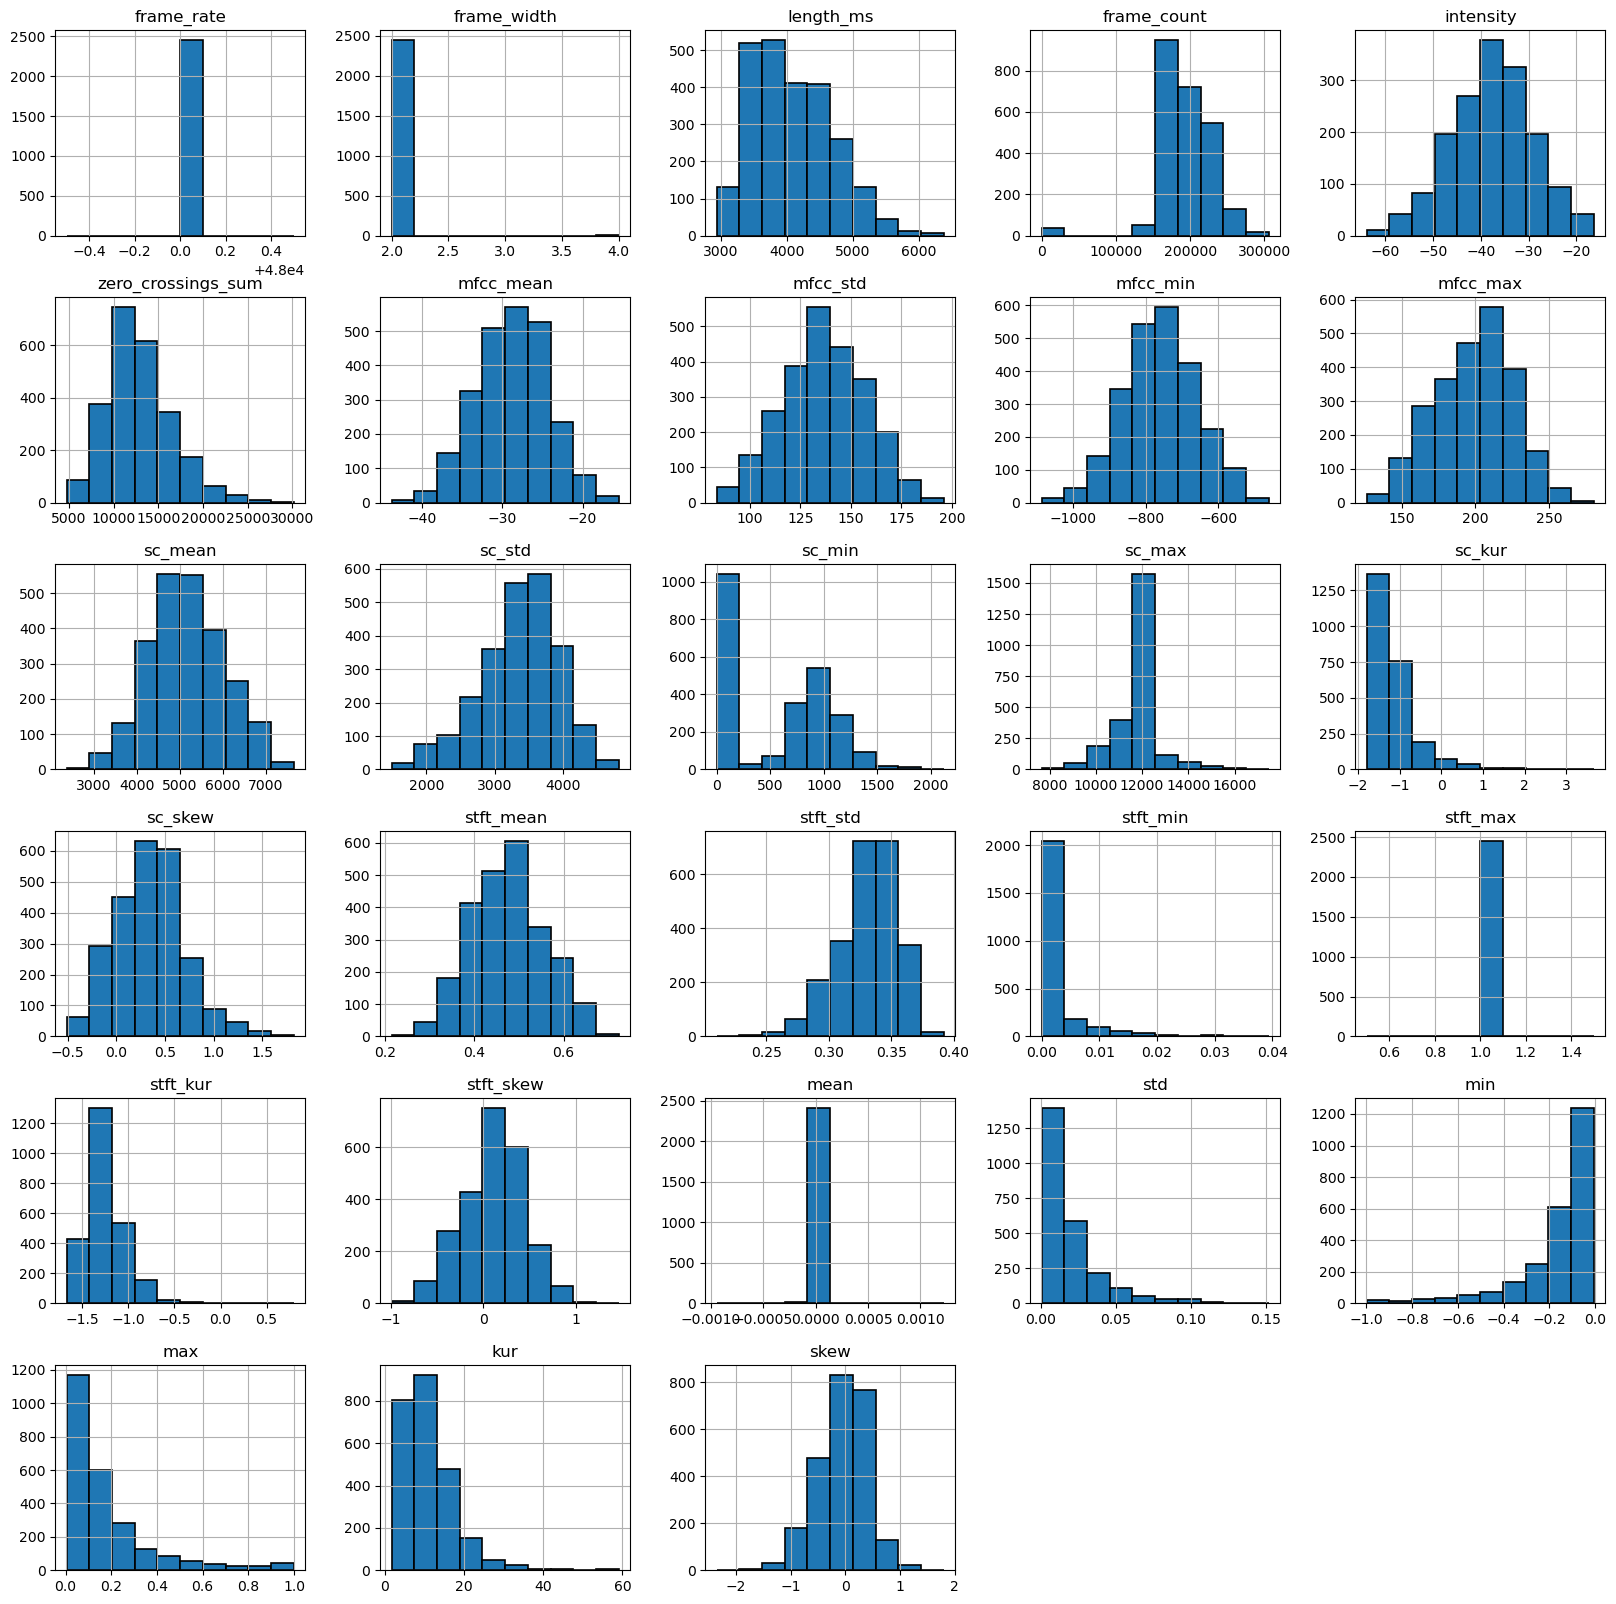

In [11]:
df.hist(edgecolor='black', column= numerical_cols, linewidth=1.2, figsize=(20, 20));

(array([0]), [Text(0, 0, 'audio-only')])

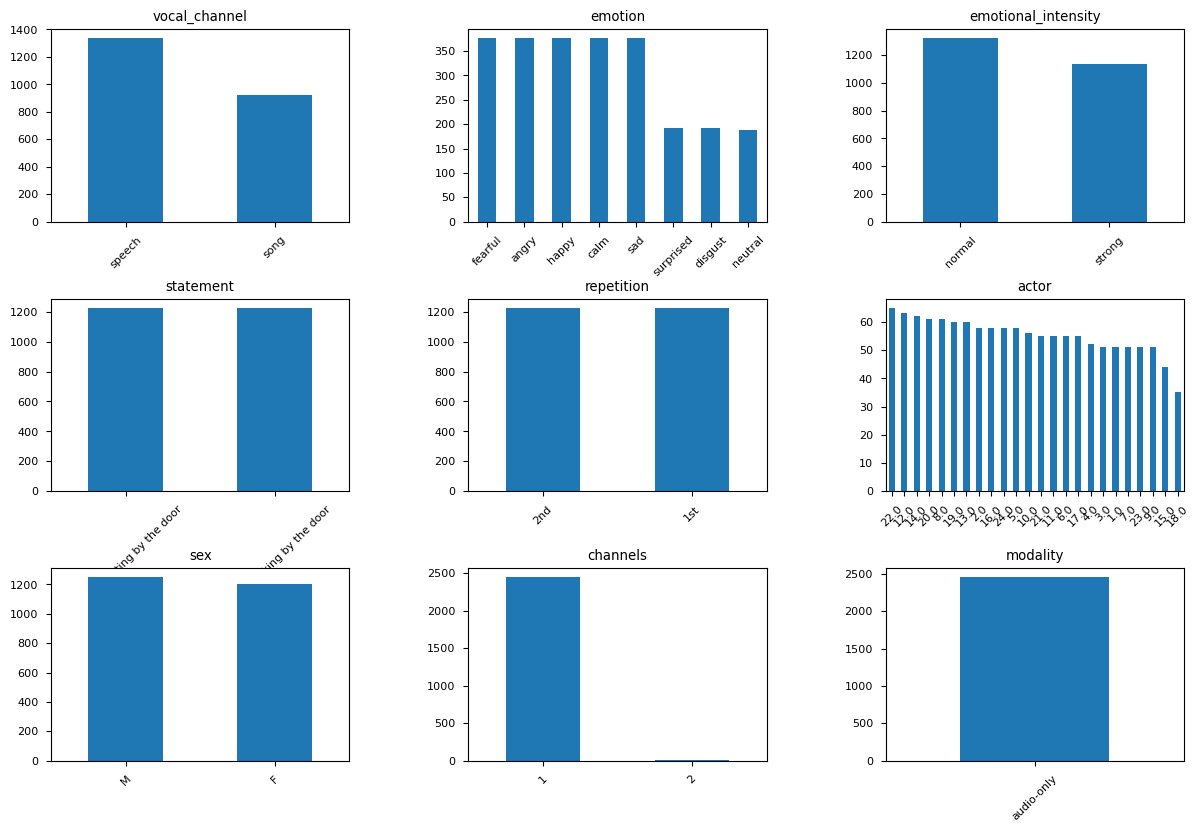

In [18]:
fig = plt.figure(figsize=(20,20))
fig_dims = (6,4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot2grid(fig_dims, (0,0))
df['vocal_channel'].value_counts().plot(kind='bar', title='vocal_channel')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (0,1))
df['emotion'].value_counts().plot(kind='bar', title='emotion')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (0,2))
df['emotional_intensity'].value_counts().plot(kind='bar', title='emotional_intensity')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (1,0))
df['statement'].value_counts().plot(kind='bar', title='statement')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (1,1))
df['repetition'].value_counts().plot(kind='bar', title='repetition')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (1,2))
df['actor'].value_counts().plot(kind='bar', title='actor')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (2,0))
df['sex'].value_counts().plot(kind='bar', title='sex')
plt.xticks(rotation=45)


plt.subplot2grid(fig_dims, (2,1))
df['channels'].value_counts().plot(kind='bar', title='channels')
plt.xticks(rotation=45)
   
plt.subplot2grid(fig_dims, (2,2))
df['modality'].value_counts().plot(kind='bar', title='modality')
plt.xticks(rotation=45)

In [12]:
del df["actor"]
del df["modality"]
del df["channels"]
del df["mfcc_mean"]
del df["mfcc_std"]
del df["mfcc_min"]
del df["mfcc_max"]
del df["sc_mean"]
del df["sc_std"]
del df["sc_min"]
del df["sc_max"]
del df["sc_kur"]
del df["sc_skew"]
del df["stft_mean"]
del df["stft_std"]
del df["stft_min"]
del df["stft_max"]
del df["stft_kur"]
del df["stft_skew"]
del df["mean"]
del df["std"]
del df["min"]
del df["max"]
del df["kur"]
del df["skew"]
del df["frame_rate"]
del df["sample_width"]

In [13]:
df.shape

(2452, 11)

In [14]:
df.isnull().sum()

vocal_channel          196
emotion                  0
emotional_intensity      0
statement                0
repetition               0
sex                      0
frame_width              0
length_ms                0
frame_count              0
intensity              816
zero_crossings_sum       0
dtype: int64

In [22]:
df['vocal_channel'].value_counts()

speech    1335
song       921
Name: vocal_channel, dtype: int64

In [15]:
1335/(1335+921)

0.5917553191489362

In [16]:
df['vocal_channel']=df['vocal_channel'].fillna(pd.Series((np.random.choice(["speech", "song"], p=[0.591, 1-0.591], size=len(df)))))

In [17]:
df['vocal_channel'].value_counts()

speech    1442
song      1010
Name: vocal_channel, dtype: int64

In [18]:
df["intensity"].describe()

count    1636.000000
mean      -37.625332
std         8.451982
min       -63.864613
25%       -43.539869
50%       -37.072745
75%       -31.591309
max       -16.353953
Name: intensity, dtype: float64

In [19]:
df["intensity"].isna().sum()

816

<AxesSubplot:xlabel='intensity', ylabel='Count'>

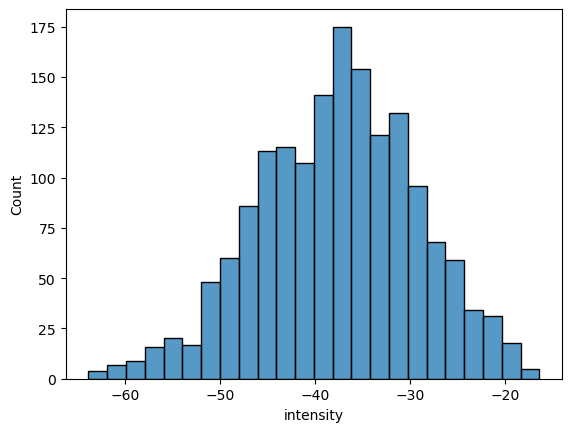

In [20]:
sns.histplot(df['intensity']) #before replacing missing values

In [21]:
df["intensity"]=df["intensity"].fillna(pd.Series([np.random.normal(loc=df["intensity"].mean(), scale=df["intensity"].std()) for x in range(len(df))]))

<AxesSubplot:xlabel='intensity', ylabel='Count'>

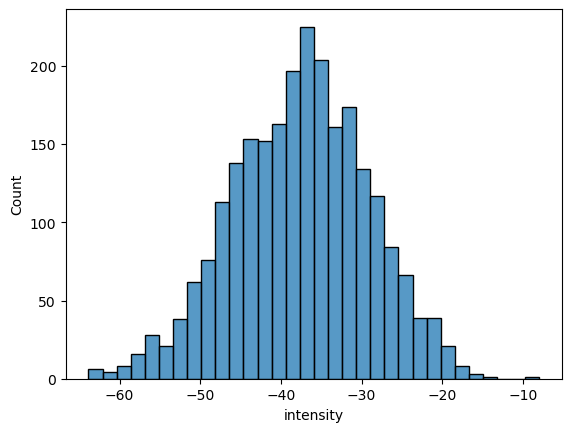

In [22]:
sns.histplot(df['intensity']) #after replaceing missing values

<AxesSubplot:xlabel='frame_count', ylabel='Count'>

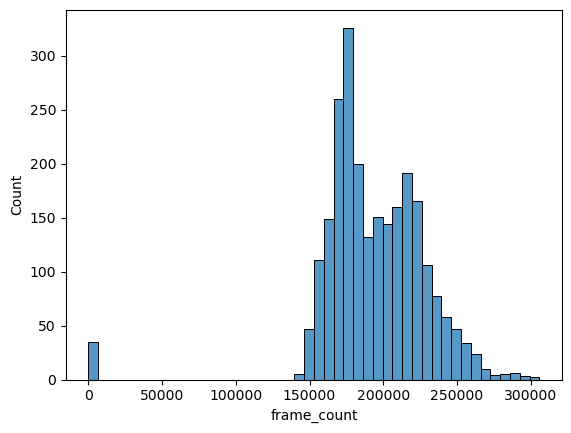

In [23]:
sns.histplot(df["frame_count"]) #before replacing missing values

In [24]:
df["frame_count"] = df["frame_count"].replace(-1, df["frame_count"].median())

<AxesSubplot:xlabel='frame_count', ylabel='Count'>

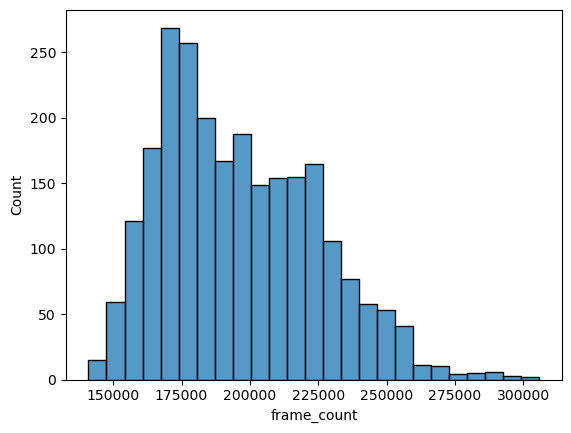

In [25]:
sns.histplot(df["frame_count"]) #after replacing missing values

In [26]:
df.iloc[:,7:len(df)].describe()

,length_ms,frame_count,intensity,zero_crossings_sum
count,2452.000000,2452.000000,2452.000000,2452.000000
mean,4092.151305,196307.710033,-37.573413,12885.314029
std,598.321526,28524.957852,8.429696,3665.319584
min,2936.000000,140941.000000,-63.864613,4721.000000
25%,3604.000000,172973.000000,-43.498659,10362.500000
50%,4004.000000,190591.000000,-37.162503,12383.500000
75%,4538.000000,217817.000000,-31.596241,14966.000000
max,6373.000000,305906.000000,-7.955048,30153.000000


In [27]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

for col in df.iloc[:,7:len(df)]:
    mean = df[col].mean()
    std_dev = df[col].std(axis=0)
    df[col] = df[col].map(lambda x: replace_outlier(x, mean, std_dev))



In [28]:
df.corr()

,frame_width,length_ms,frame_count,intensity,zero_crossings_sum
frame_width,1.000000,-0.011417,-0.011297,-0.053464,-0.039982
length_ms,-0.011417,1.000000,0.992299,0.193892,0.333822
frame_count,-0.011297,0.992299,1.000000,0.191758,0.329860
intensity,-0.053464,0.193892,0.191758,1.000000,0.340255
zero_crossings_sum,-0.039982,0.333822,0.329860,0.340255,1.000000


<AxesSubplot:title={'center':'Attrition Correlation Heatmap'}>

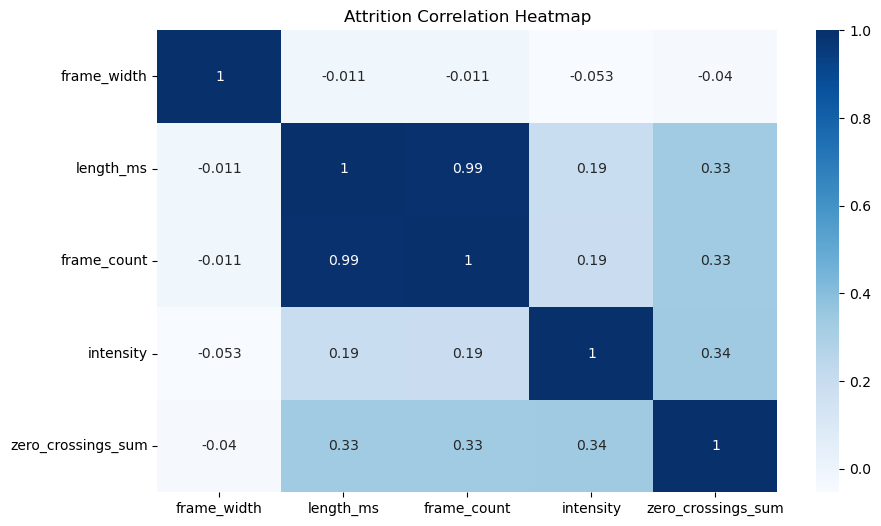

In [30]:
corr = df.corr()

corr_matrix = df.corr()
f , ax = plt.subplots(figsize=(10,6))
ax.set_title("Attrition Correlation Heatmap")
sns.heatmap(corr_matrix,vmax=1.0,cmap='Blues', annot=True)

In [34]:
del df["frame_count"]
del df["frame_width"]

KeyError: 'frame_count'

In [36]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,intensity,zero_crossings_sum
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737.0,-36.793432,16995.0
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904.0,-38.155986,13906.0
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,4671.0,-32.290737,18723.0
3,speech,surprised,normal,Kids are talking by the door,1st,F,3637.0,-49.019839,11617.0
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404.0,-31.214503,15137.0


# DATA CLUSTERING

# KMEANS

In [37]:
dcl=df.iloc[:,6:len(df)]

In [38]:
dcl.head()

,length_ms,intensity,zero_crossings_sum
0,3737.0,-36.793432,16995.0
1,3904.0,-38.155986,13906.0
2,4671.0,-32.290737,18723.0
3,3637.0,-49.019839,11617.0
4,4404.0,-31.214503,15137.0


In [39]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import LabelEncoder, StandardScaler
from kneed import KneeLocator

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(dcl.values)

In [43]:
DCL=pd.DataFrame(X)

In [44]:
X

array([[-0.59529711,  0.0927087 ,  1.14343819],
       [-0.31457107, -0.06914837,  0.2873714 ],
       [ 0.97475156,  0.62758144,  1.62232566],
       ...,
       [ 1.92955632, -0.21705997, -0.86024031],
       [-0.59529711, -0.97138759, -0.87381987],
       [-0.42719768, -0.29034126, -0.95391159]])

In [45]:
DCL.columns = dcl.columns

In [46]:
DCL.head()

,length_ms,intensity,zero_crossings_sum
0,-0.595297,0.092709,1.143438
1,-0.314571,-0.069148,0.287371
2,0.974752,0.627581,1.622326
3,-0.763397,-1.359660,-0.346988
4,0.525926,0.755427,0.628523


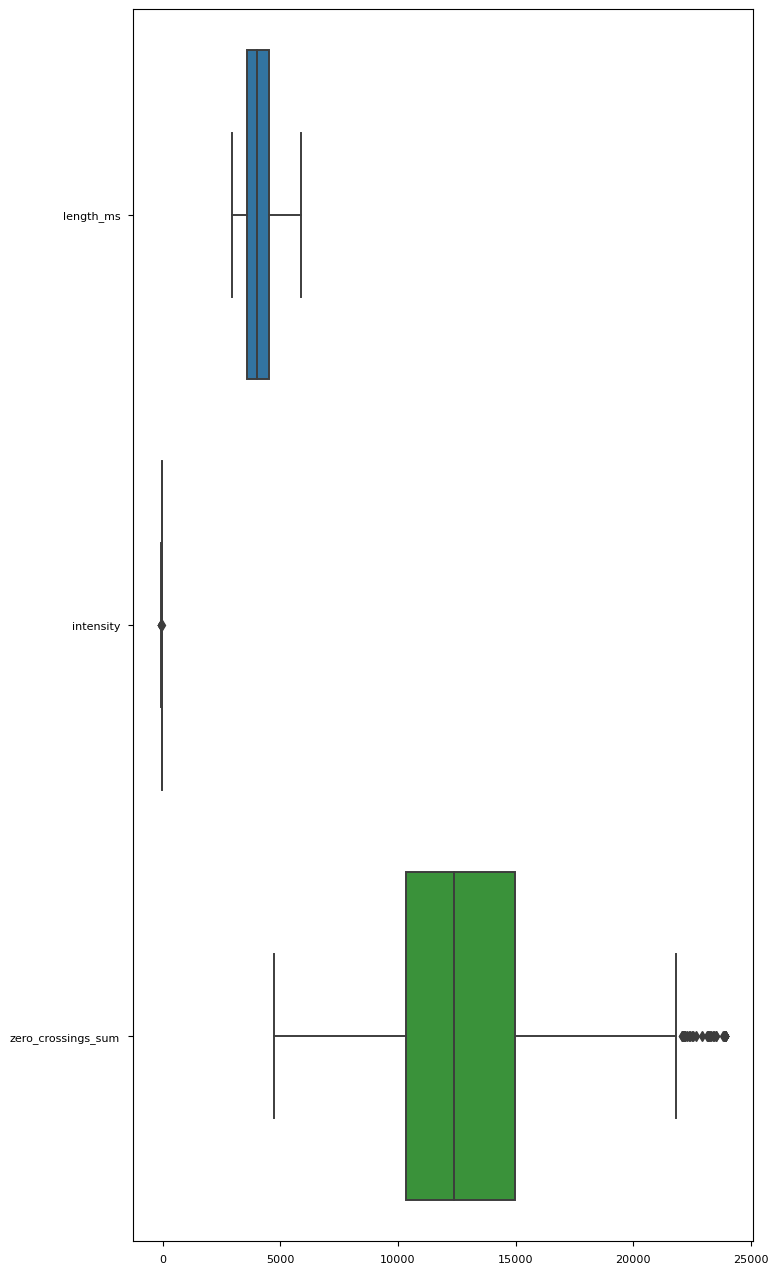

In [47]:
plt.figure(figsize = (8,16))
sns.boxplot(data = dcl, orient = "h")
plt.show()

In [48]:
DCL.describe()

,length_ms,intensity,zero_crossings_sum
count,2.452000e+03,2.452000e+03,2.452000e+03
mean,5.464181e-16,-6.133167e-16,6.420458e-17
std,1.000204e+00,1.000204e+00,1.000204e+00
min,-1.941774e+00,-3.004022e+00,-2.258104e+00
25%,-8.188694e-01,-7.038017e-01,-6.946528e-01
50%,-1.464716e-01,4.886696e-02,-1.345650e-01
75%,7.511793e-01,7.100803e-01,5.811334e-01
max,3.019035e+00,3.004133e+00,3.051858e+00


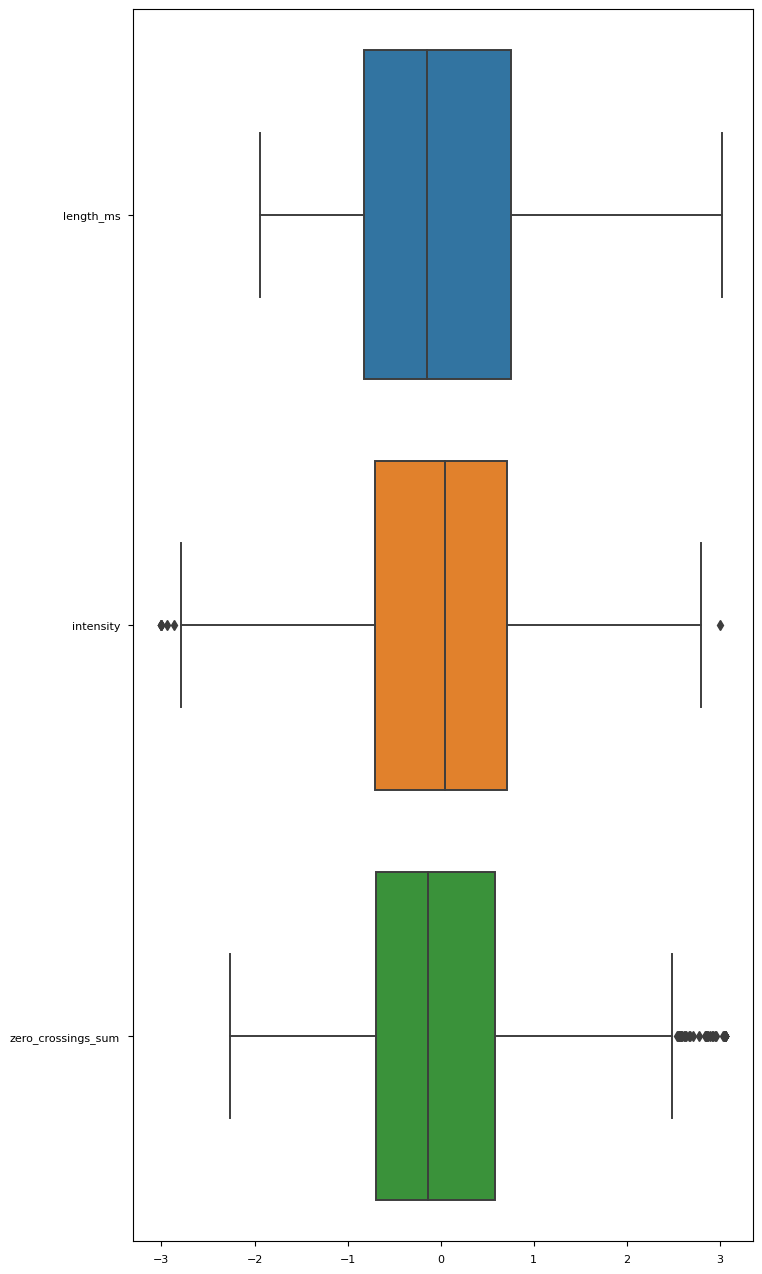

In [49]:
plt.figure(figsize = (8,16))
sns.boxplot(data = DCL, orient = "h")
plt.show()

<AxesSubplot:>

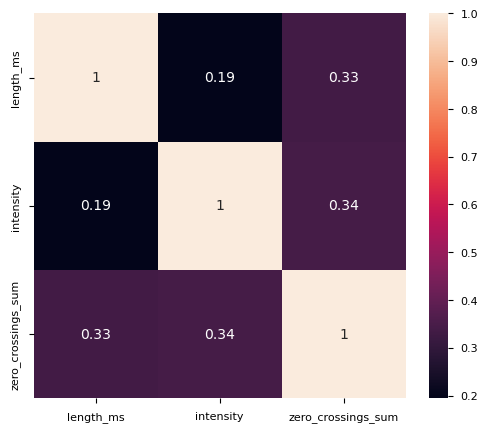

In [50]:
plt.figure(figsize = (6,5))
sns.heatmap( DCL.corr(), annot=True)


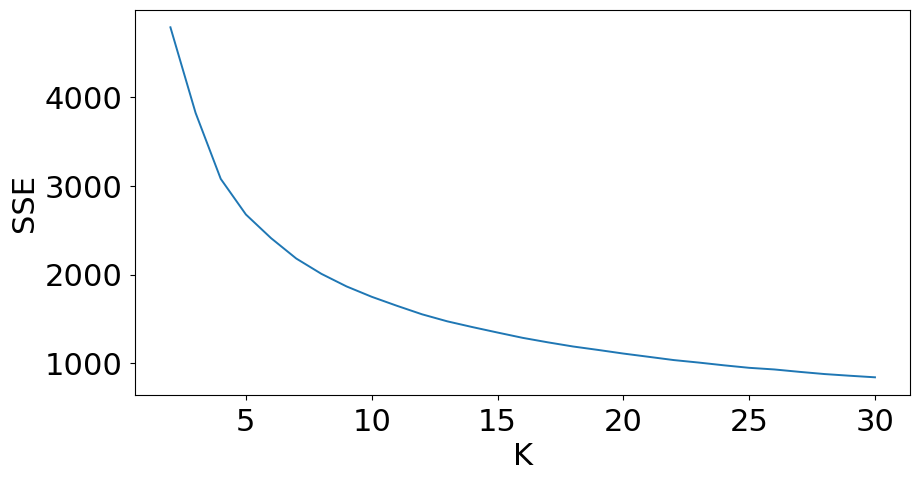

In [51]:
sse_list = list()
silouette_scores = {}
max_k = 30
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(DCL)

    sse = kmeans.inertia_
    sse_list.append(sse)

    labels_k = kmeans.labels_
    silouette = metrics.silhouette_score(DCL, labels_k)
    silouette_scores[k] = silouette


plt.figure(figsize = (10,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()


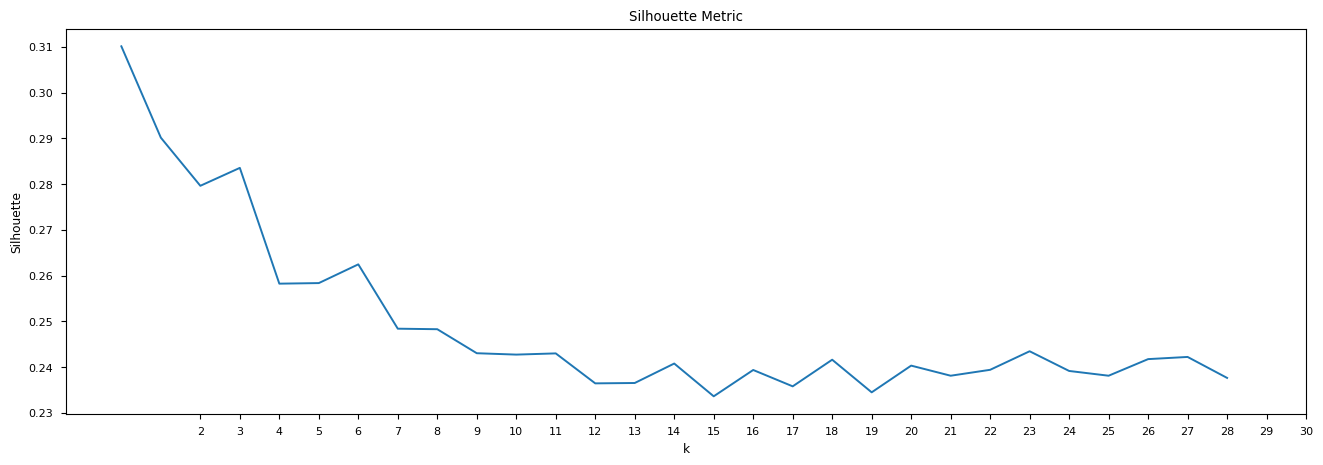

In [52]:
plt.figure(figsize = (16,5))
plt.plot(silouette_scores.values())
plt.xticks(range(2, len(sse_list) + 2), silouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()


In [55]:
#!pip install kneed

In [53]:
from kneed import KneeLocator

In [54]:
X

array([[-0.59529711,  0.0927087 ,  1.14343819],
       [-0.31457107, -0.06914837,  0.2873714 ],
       [ 0.97475156,  0.62758144,  1.62232566],
       ...,
       [ 1.92955632, -0.21705997, -0.86024031],
       [-0.59529711, -0.97138759, -0.87381987],
       [-0.42719768, -0.29034126, -0.95391159]])

In [93]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(DCL)

KMeans(max_iter=100, n_clusters=3)

In [94]:
final_sse = kmeans.inertia_
print("Final SSE: ", final_sse)

Final SSE:  3986.583420144285


In [95]:
labels_k = kmeans.labels_
final_silouette = metrics.silhouette_score(DCL, labels_k)
print("Final silouette: ", final_silouette)
print("First 5 labels: ", kmeans.labels_[:5])
print("Dimensions of clusters: ", np.unique(kmeans.labels_, return_counts=True))

Final silouette:  0.2875978026880865
First 5 labels:  [1 2 1 2 1]
Dimensions of clusters:  (array([0, 1, 2]), array([ 696,  721, 1035], dtype=int64))


In [96]:
hist, bins = np.histogram(kmeans.labels_,
                          bins=range(0, len(set(kmeans.labels_)) + 1))
print(dict(zip(bins, hist)))

print(kmeans.cluster_centers_)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

{0: 696, 1: 721, 2: 1035}
[[ 1.08770518 -0.03536058 -0.10057871 -0.00718391]
 [ 0.09706504  0.85281567  1.0176713  -0.00277393]
 [-0.79905961 -0.57030834 -0.64129297 -0.00386473]]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) (3,4) 

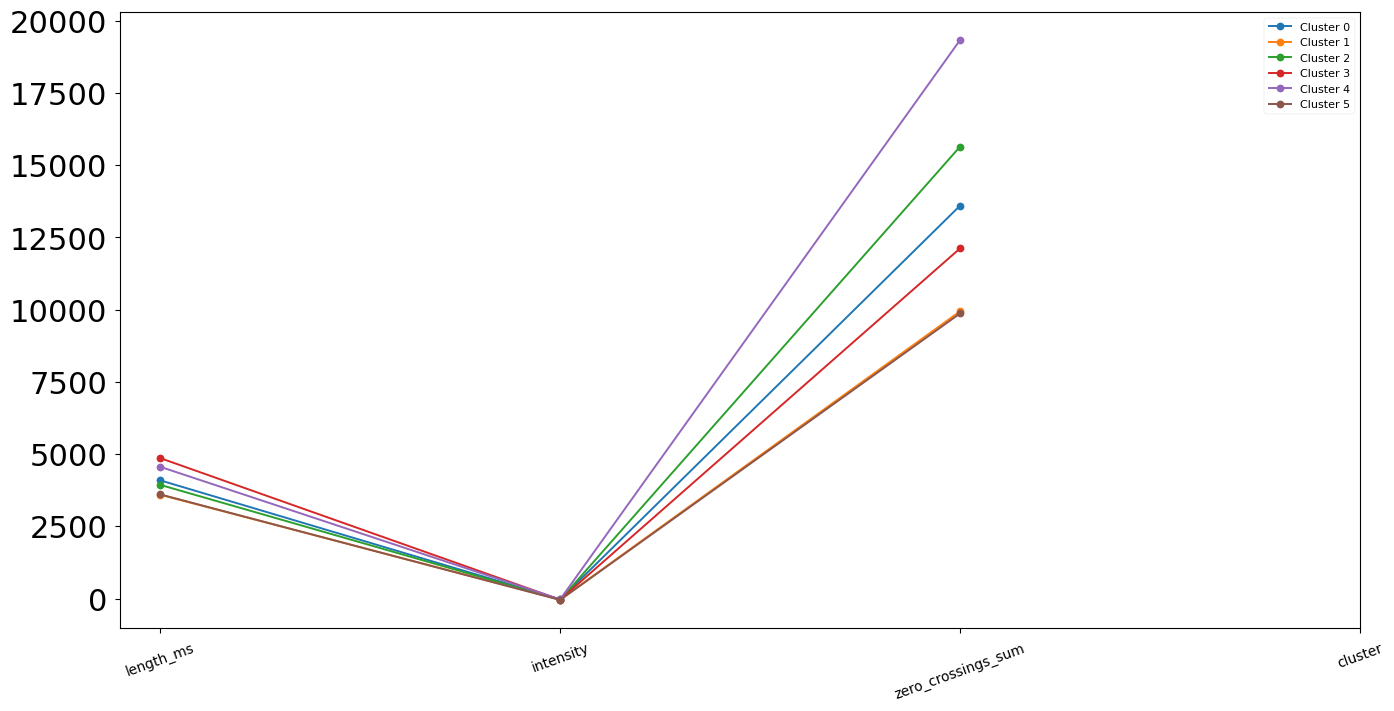

In [97]:
plt.figure(figsize=(16, 8))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(DCL.columns)), DCL.columns, fontsize=10, rotation=20)
plt.legend(fontsize=8)
plt.show()

In [98]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X, kmeans.labels_))

SSE 3986.583420144285
Silhouette 0.2903174925804603


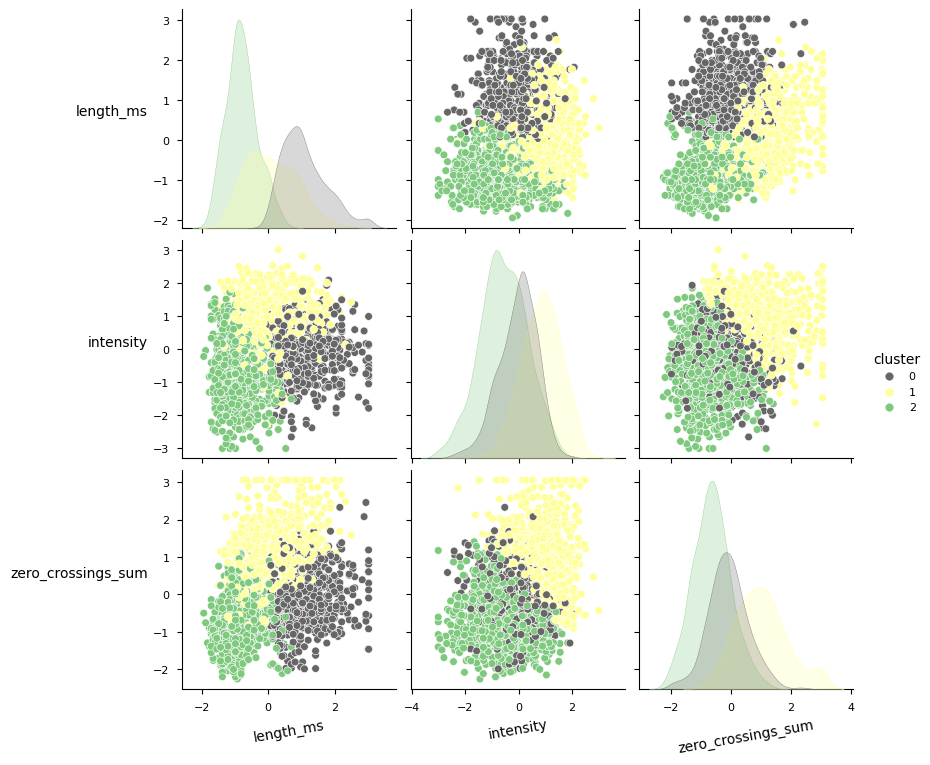

In [99]:
DCL["cluster"] = kmeans.labels_
g=sns.pairplot(data = DCL, hue = "cluster", palette = "Accent_r")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize= 10 , rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), fontsize= 10, rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

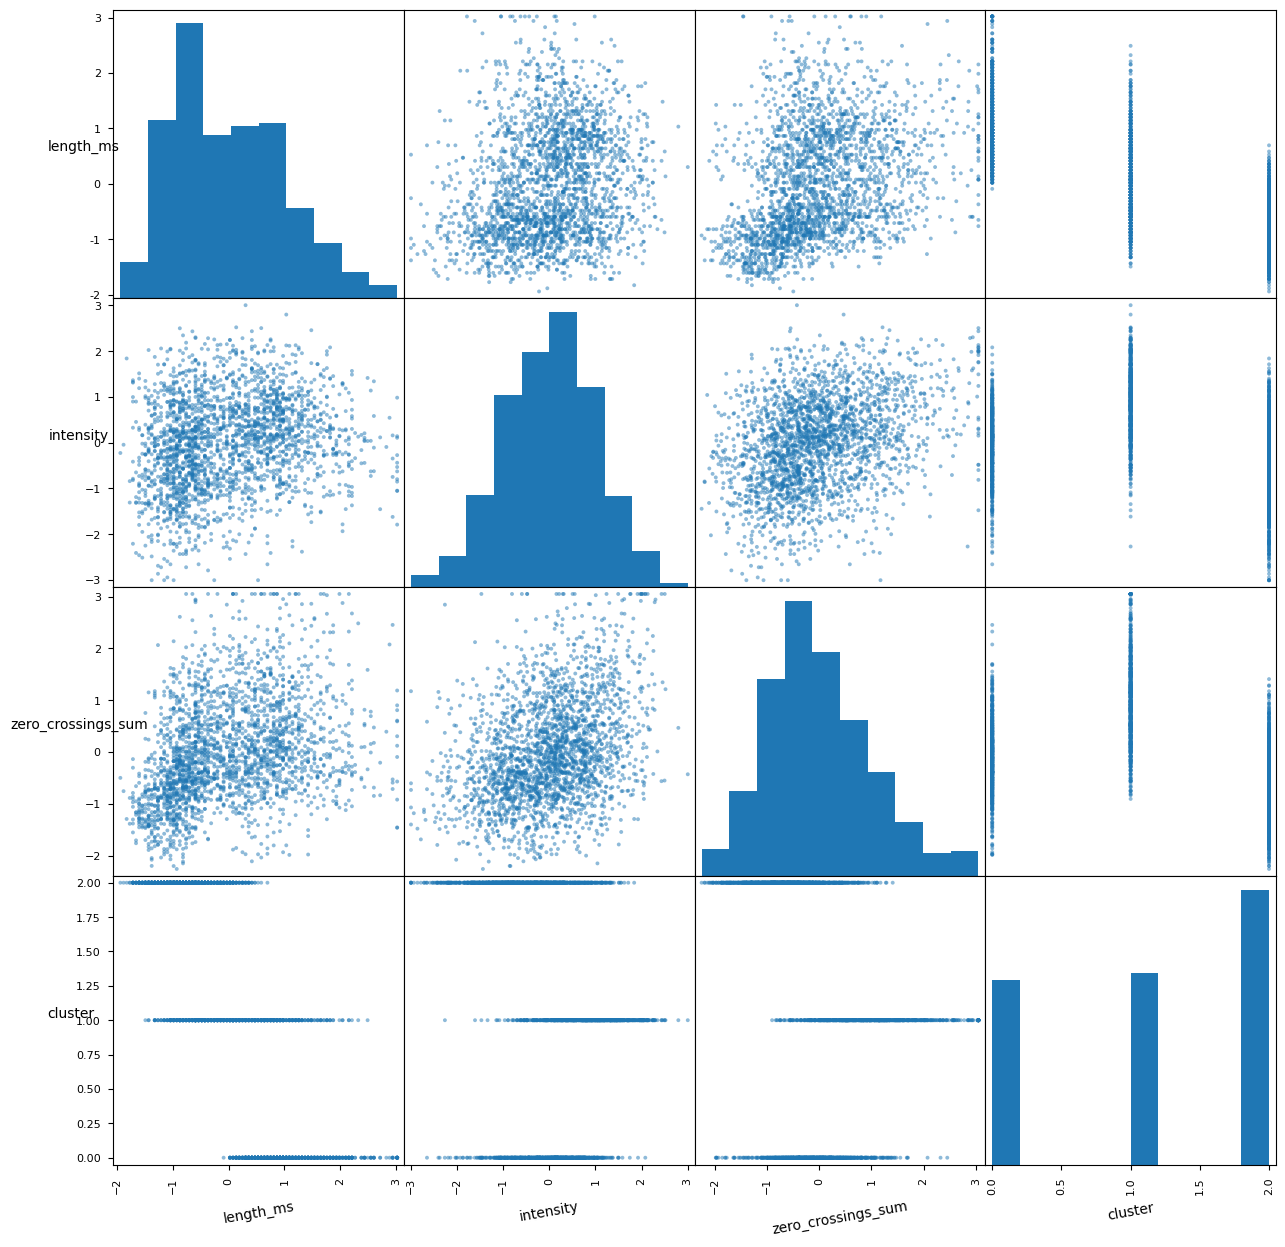

In [100]:
scatter_matrix = scatter_matrix(DCL, figsize=(15, 15))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 10)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

# DBSCAN

In [67]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

In [68]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

In [69]:
from scipy.spatial.distance import pdist, squareform

In [70]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)
# Stimare il migliore eps

dist = pdist(X, 'euclidean')
dist = squareform(dist)

k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

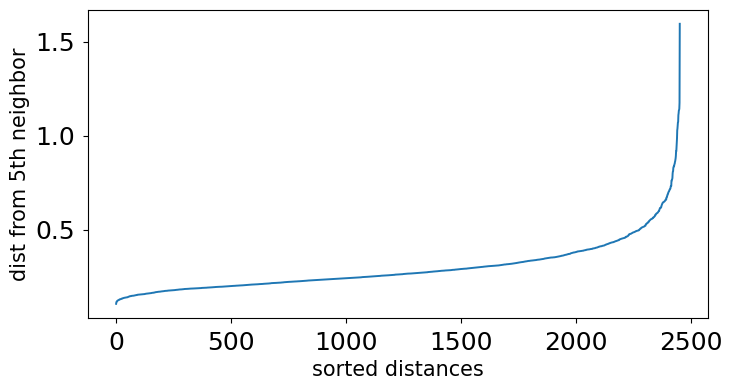

In [71]:
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [72]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

In [76]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([  58, 2369,   10,    8,    7], dtype=int64))

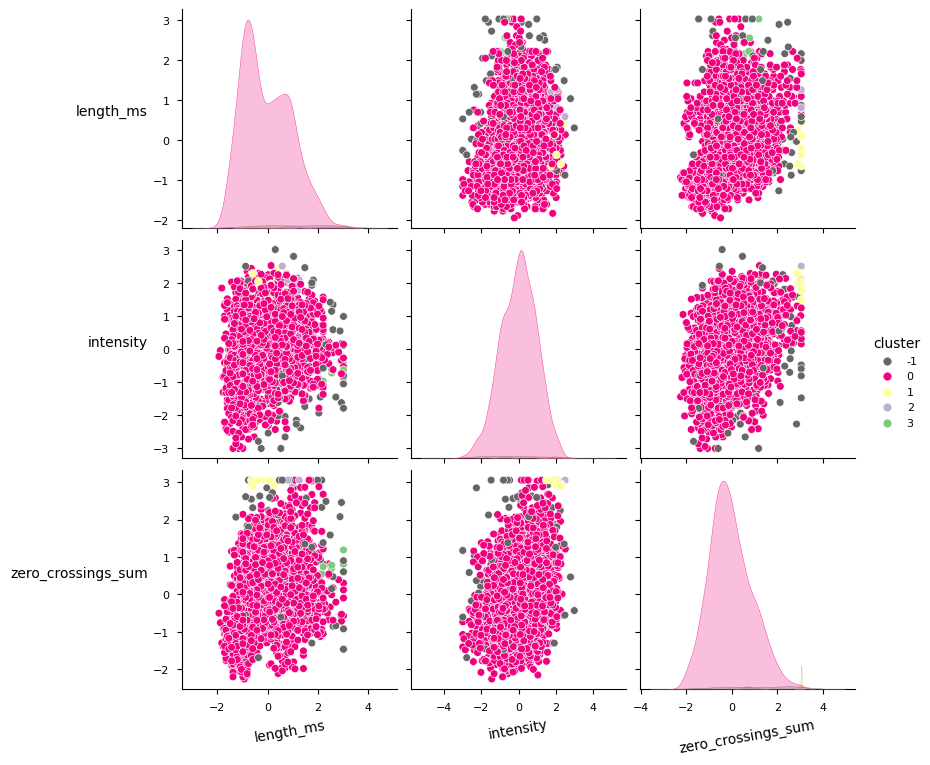

In [77]:
DCL["cluster"] = dbscan.labels_
g=sns.pairplot(data = DCL, hue = "cluster", palette = "Accent_r")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize= 10 , rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), fontsize= 10, rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

In [ ]:
X

# HIERARCHICAL

In [ ]:
#!pip install fastcluster

In [78]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import sklearn
import fastcluster
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [79]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram ')
        plt.xlabel('distance')
        plt.ylabel('sample index or (cluster size)')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axvline(x=max_d, c='k')
    return ddata

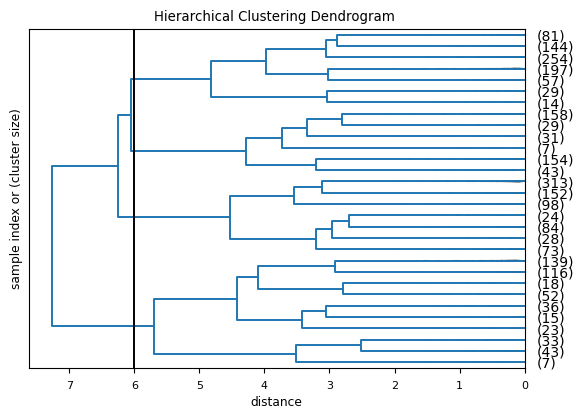

In [87]:
data_dist = pdist(X, metric='euclidean')
# Generazione della matrice linkage
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp',leaf_rotation=0, orientation='left',show_leaf_counts=True, show_contracted=True,max_d=6, annotate_above=10)


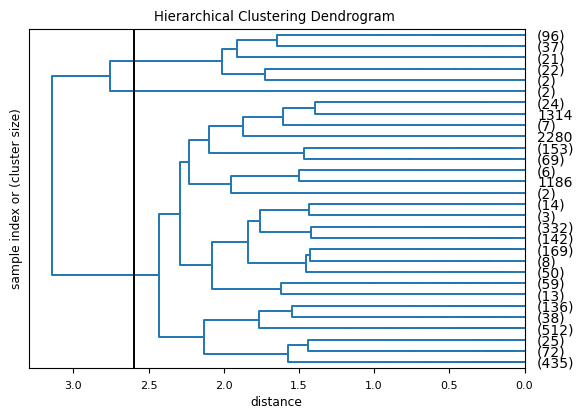

In [85]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp',leaf_rotation=0, orientation='left', show_leaf_counts=True, show_contracted=True,max_d=2.6, annotate_above=10)


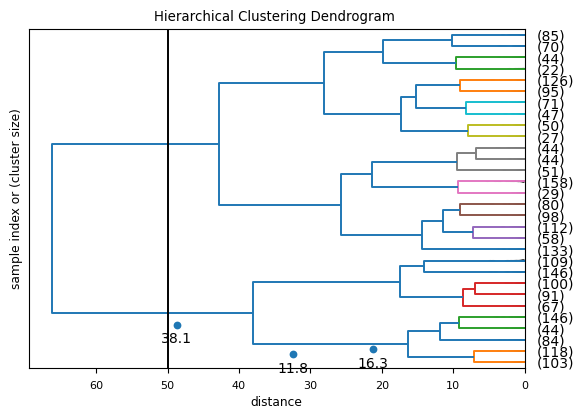

In [90]:
data_dist = pdist(X, metric='euclidean')
# Ward è il metodo che utilizziamo per misurare la distanza tra i cluster appena creati
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=10, truncate_mode='lastp',leaf_rotation=0, orientation='left', show_leaf_counts=True, show_contracted=True,max_d=50, annotate_above=10)


In [86]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None
for i in range(2, 10):
    complete = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(X, complete.labels_))

Numero Cluster:  2
Cluster {0: 1970, 1: 482}
Silhouette Score 0.21646944941146656
Numero Cluster:  3
Cluster {0: 1198, 1: 482, 2: 772}
Silhouette Score 0.18866785487830767
Numero Cluster:  4
Cluster {0: 482, 1: 776, 2: 772, 3: 422}
Silhouette Score 0.2181664914772812
Numero Cluster:  5
Cluster {0: 776, 1: 399, 2: 772, 3: 422, 4: 83}
Silhouette Score 0.18774931406834108
Numero Cluster:  6
Cluster {0: 772, 1: 399, 2: 733, 3: 422, 4: 83, 5: 43}
Silhouette Score 0.15638342696425234
Numero Cluster:  7
Cluster {0: 399, 1: 422, 2: 733, 3: 563, 4: 83, 5: 43, 6: 209}
Silhouette Score 0.12452651762668916
Numero Cluster:  8
Cluster {0: 422, 1: 325, 2: 733, 3: 563, 4: 83, 5: 43, 6: 209, 7: 74}
Silhouette Score 0.13007595385716889
Numero Cluster:  9
Cluster {0: 325, 1: 225, 2: 733, 3: 563, 4: 83, 5: 43, 6: 209, 7: 74, 8: 197}
Silhouette Score 0.12748128973774925


In [88]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None
for i in range(2, 10):
    average = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='euclidean', connectivity=connectivity)
    average.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(average.labels_)) + 1))
    
       
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(X, complete.labels_))

Numero Cluster:  2
Cluster {0: 325, 1: 958}
Silhouette Score 0.12748128973774925
Numero Cluster:  3
Cluster {0: 325, 1: 225, 2: 1296}
Silhouette Score 0.12748128973774925
Numero Cluster:  4
Cluster {0: 325, 1: 225, 2: 733, 3: 646}
Silhouette Score 0.12748128973774925
Numero Cluster:  5
Cluster {0: 325, 1: 225, 2: 733, 3: 563, 4: 126}
Silhouette Score 0.12748128973774925
Numero Cluster:  6
Cluster {0: 325, 1: 225, 2: 733, 3: 563, 4: 83, 5: 252}
Silhouette Score 0.12748128973774925
Numero Cluster:  7
Cluster {0: 325, 1: 225, 2: 733, 3: 563, 4: 83, 5: 43, 6: 283}
Silhouette Score 0.12748128973774925
Numero Cluster:  8
Cluster {0: 325, 1: 225, 2: 733, 3: 563, 4: 83, 5: 43, 6: 209, 7: 271}
Silhouette Score 0.12748128973774925
Numero Cluster:  9
Cluster {0: 325, 1: 225, 2: 733, 3: 563, 4: 83, 5: 43, 6: 209, 7: 74, 8: 197}
Silhouette Score 0.12748128973774925


In [89]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None

for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean', connectivity=connectivity)
    ward.fit(X)
    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(X, ward.labels_))

Numero Cluster:  2
Cluster {0: 1444, 1: 1008}
Silhouette Score 0.26567183730864585
Numero Cluster:  3
Cluster {0: 1008, 1: 637, 2: 807}
Silhouette Score 0.24975414951642294
Numero Cluster:  4
Cluster {0: 637, 1: 513, 2: 807, 3: 495}
Silhouette Score 0.22246525766623473
Numero Cluster:  5
Cluster {0: 807, 1: 513, 2: 221, 3: 495, 4: 416}
Silhouette Score 0.22155319154975037
Numero Cluster:  6
Cluster {0: 326, 1: 513, 2: 221, 3: 495, 4: 416, 5: 481}
Silhouette Score 0.21643311655036482
Numero Cluster:  7
Cluster {0: 221, 1: 513, 2: 481, 3: 495, 4: 416, 5: 139, 6: 187}
Silhouette Score 0.21669539383524047
Numero Cluster:  8
Cluster {0: 513, 1: 416, 2: 481, 3: 495, 4: 155, 5: 139, 6: 187, 7: 66}
Silhouette Score 0.2160052312330207
Numero Cluster:  9
Cluster {0: 416, 1: 495, 2: 481, 3: 255, 4: 155, 5: 139, 6: 187, 7: 66, 8: 258}
Silhouette Score 0.19206768240040153


In [ ]:
#Agglomerative cluster Ward Method
#Numero Cluster:  2
#Cluster {0: 1444, 1: 1008}
#Silhouette Score 0.26567183730864585

In [101]:
print('dbscan Silhouette', silhouette_score(X,dbscan.labels_))

dbscan Silhouette 0.21669945312797087


In [102]:
#best cluster
print('Silhouette', silhouette_score(X, kmeans.labels_))

Silhouette 0.2903174925804603
